cargo los datos del drive

In [23]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# importamos librerias para el manejo de datos pandas para manejo de datos y numpy operaciones con numeros
import numpy as np
import pandas as pd

#import tools

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [105]:
train=pd.read_csv('/content/drive/MyDrive/bigdata3/proyecto homicidios/columnas_sin_movilidad.csv')

In [ ]:
train.head()

In [106]:
train_1 = train[['Fecha', 'Departamento', 'Dia', 'HoraEstandarizada', 'Modalidad', 'Zona', 'Edad', 'Sexo']]
train_1.head()

,Fecha,Departamento,Dia,HoraEstandarizada,Modalidad,Zona,Edad,Sexo
0,08/12/2010 0:00,VALLE,Miercoles,1,ARMA DE FUEGO,URBANA,18,MASCULINO
1,01/01/2010 0:00,ANTIOQUIA,Viernes,8,ARMA DE FUEGO,URBANA,32,MASCULINO
2,08/11/2010 0:00,NORTE DE SANTANDER,Lunes,7,ARMA DE FUEGO,URBANA,48,MASCULINO
3,01/01/2010 0:00,CAUCA,Lunes,23,ARMA DE FUEGO,URBANA,26,MASCULINO
4,01/01/2010 0:00,CUNDINAMARCA,Domingo,0,ARMA BLANCA,URBANA,43,MASCULINO


In [107]:
#para la columna fecha
#convierto la columna Fecha a tipo fecha con to_datetime()
df = pd.to_datetime(train_1['Fecha'])
#cargo el train_1 en un dataframe para agregar la columna mes
train_1 = pd.DataFrame(train_1)
#agrego la columna mes al train_1
train_1['Mes'] = df.dt.month

#ya se obtubo el mes de la fecha y se agregó esa nueva columna al train_1
#creamos categorias a paetir de los valores existentes para el mes
train_1=pd.concat([train_1,pd.get_dummies(train_1['Mes'],prefix='Mes_')],axis=1)
#miro como van quedando los datos

#hacemos lo mismo para la columna Departamento
train_1=pd.concat([train_1,pd.get_dummies(train_1['Departamento'],prefix='Departamento_')],axis=1)

#hacemos lo mismo para la columna Dia
train_1=pd.concat([train_1,pd.get_dummies(train_1['Dia'],prefix='Dia_')],axis=1)

#para la columna HoraEstandarizada que se sacó solo la hora mas rápido con excel
train_1=pd.concat([train_1,pd.get_dummies(train_1['HoraEstandarizada'],prefix='Hora_')],axis=1)

#dummies crea categorias a paetir de los valores existentes para Zona

#cambio el texto por 0 urbana y 1 rural 
train_1['Zona'].replace(
   to_replace= ['URBANA','RURAL'],
    value= [0,1],
    inplace=True
)

#hacemos lo mismo para la columna Modalidad
train_1=pd.concat([train_1,pd.get_dummies(train_1['Modalidad'],prefix='Modalidad_')],axis=1)

#hacemos lo mismo para la columna Movil_Agresor
#train_1=pd.concat([train_1,pd.get_dummies(train_1['Movil_Agresor'],prefix='Movil_Agresor_')],axis=1)

#hacemos lo mismo para la columna Movil_Victima
#train_1=pd.concat([train_1,pd.get_dummies(train_1['Movil_Victima'],prefix='Movil_Victima_')],axis=1)

#normalizo la columna edad (valor - min) / (max - min)
df_norm = (train_1['Edad'] - train_1['Edad'].min()) / (train_1['Edad'].max()-train_1['Edad'].min())

#ya habia agregado el train_1 a un data frame en fecha ahora agrego la columna edad normalizada al train_1
train_1['edad_normalizada'] = df_norm

#hacemos lo mismo para la columna sexo
train_1=pd.concat([train_1,pd.get_dummies(train_1['Sexo'],prefix='Sexo_')],axis=1)

train_1.head()

,Fecha,Departamento,Dia,HoraEstandarizada,Modalidad,Zona,Edad,Sexo,Mes,Mes__1,Mes__2,Mes__3,Mes__4,Mes__5,Mes__6,Mes__7,Mes__8,Mes__9,Mes__10,Mes__11,Mes__12,Departamento__AMAZONAS,Departamento__ANTIOQUIA,Departamento__ARAUCA,Departamento__ATLANTICO,Departamento__BOLIVAR,Departamento__BOYACA,Departamento__CALDAS,Departamento__CAQUETA,Departamento__CASANARE,Departamento__CAUCA,Departamento__CESAR,Departamento__CHOCO,Departamento__CORDOBA,Departamento__CUNDINAMARCA,Departamento__GUAINIA,Departamento__GUAJIRA,Departamento__GUAVIARE,Departamento__HUILA,Departamento__MAGDALENA,...,Modalidad__ACIDO,Modalidad__ALMOHADA,Modalidad__ARMA BLANCA,Modalidad__ARMA BLANCA / CORTOPUNZANTE,Modalidad__ARMA DE FUEGO,Modalidad__ARTEFACTO EXPLOSIVO/CARGA DINAMITA,Modalidad__ARTEFACTO INCENDIARIO,Modalidad__BOLSA PLASTICA,Modalidad__CARRO BOMBA,Modalidad__CASA BOMBA,Modalidad__CILINDRO BOMBA,Modalidad__CINTAS,Modalidad__CINTAS/CINTURON,Modalidad__COMBUSTIBLE,Modalidad__CONTUNDENTES,Modalidad__CORTANTES,Modalidad__CUERDA/SOGA/CADENA,Modalidad__ESCOPOLAMINA,Modalidad__GASES,Modalidad__GASOLINA,Modalidad__GRANADA DE MANO,Modalidad__GRANADA DE MORTERO,Modalidad__JERINGA,Modalidad__LIQUIDOS,Modalidad__MINA ANTIPERSONA,Modalidad__MOTO BOMBA,Modalidad__OLLA BOMBA,Modalidad__PAQUETE BOMBA,Modalidad__PERSONA BOMBA,Modalidad__POLVORA(FUEGOS PIROTECNICOS),Modalidad__PRENDAS DE VESTIR,Modalidad__PUNZANTES,Modalidad__QUIMICOS,Modalidad__ROCKET,Modalidad__SIN EMPLEO DE ARMAS,Modalidad__SUSTANCIAS TOXICAS,Modalidad__VENENO,edad_normalizada,Sexo__FEMENINO,Sexo__MASCULINO
0,08/12/2010 0:00,VALLE,Miercoles,1,ARMA DE FUEGO,0,18,MASCULINO,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.18,0,1
1,01/01/2010 0:00,ANTIOQUIA,Viernes,8,ARMA DE FUEGO,0,32,MASCULINO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0,1
2,08/11/2010 0:00,NORTE DE SANTANDER,Lunes,7,ARMA DE FUEGO,0,48,MASCULINO,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.48,0,1
3,01/01/2010 0:00,CAUCA,Lunes,23,ARMA DE FUEGO,0,26,MASCULINO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.26,0,1
4,01/01/2010 0:00,CUNDINAMARCA,Domingo,0,ARMA BLANCA,0,43,MASCULINO,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.43,0,1


In [108]:
#borro las columnas que categorice con drop, el implace me dice que ejecuta todo sobre la misma 
# variable, es equivalente a train_1=train_1
train_1.drop(labels=['Fecha'],axis=1,inplace=True)
train_1.drop(labels=['Departamento'],axis=1,inplace=True)
train_1.drop(labels=['Dia'],axis=1,inplace=True)
train_1.drop(labels=['HoraEstandarizada'],axis=1,inplace=True)
#train_1.drop(labels=['Zona'],axis=1,inplace=True)
train_1.drop(labels=['Modalidad'],axis=1,inplace=True)
#train_1.drop(labels=['Movil_Agresor'],axis=1,inplace=True)
#train_1.drop(labels=['Movil_Victima'],axis=1,inplace=True)
train_1.drop(labels=['Edad'],axis=1,inplace=True)
train_1.drop(labels=['Sexo'],axis=1,inplace=True)
train_1.drop(labels=['Mes'],axis=1,inplace=True)
train_1.head()


,Zona,Mes__1,Mes__2,Mes__3,Mes__4,Mes__5,Mes__6,Mes__7,Mes__8,Mes__9,Mes__10,Mes__11,Mes__12,Departamento__AMAZONAS,Departamento__ANTIOQUIA,Departamento__ARAUCA,Departamento__ATLANTICO,Departamento__BOLIVAR,Departamento__BOYACA,Departamento__CALDAS,Departamento__CAQUETA,Departamento__CASANARE,Departamento__CAUCA,Departamento__CESAR,Departamento__CHOCO,Departamento__CORDOBA,Departamento__CUNDINAMARCA,Departamento__GUAINIA,Departamento__GUAJIRA,Departamento__GUAVIARE,Departamento__HUILA,Departamento__MAGDALENA,Departamento__META,Departamento__NARINO,Departamento__NORTE DE SANTANDER,Departamento__PUTUMAYO,Departamento__QUINDIO,Departamento__RISARALDA,Departamento__SAN ANDRES,Departamento__SANTANDER,...,Modalidad__ACIDO,Modalidad__ALMOHADA,Modalidad__ARMA BLANCA,Modalidad__ARMA BLANCA / CORTOPUNZANTE,Modalidad__ARMA DE FUEGO,Modalidad__ARTEFACTO EXPLOSIVO/CARGA DINAMITA,Modalidad__ARTEFACTO INCENDIARIO,Modalidad__BOLSA PLASTICA,Modalidad__CARRO BOMBA,Modalidad__CASA BOMBA,Modalidad__CILINDRO BOMBA,Modalidad__CINTAS,Modalidad__CINTAS/CINTURON,Modalidad__COMBUSTIBLE,Modalidad__CONTUNDENTES,Modalidad__CORTANTES,Modalidad__CUERDA/SOGA/CADENA,Modalidad__ESCOPOLAMINA,Modalidad__GASES,Modalidad__GASOLINA,Modalidad__GRANADA DE MANO,Modalidad__GRANADA DE MORTERO,Modalidad__JERINGA,Modalidad__LIQUIDOS,Modalidad__MINA ANTIPERSONA,Modalidad__MOTO BOMBA,Modalidad__OLLA BOMBA,Modalidad__PAQUETE BOMBA,Modalidad__PERSONA BOMBA,Modalidad__POLVORA(FUEGOS PIROTECNICOS),Modalidad__PRENDAS DE VESTIR,Modalidad__PUNZANTES,Modalidad__QUIMICOS,Modalidad__ROCKET,Modalidad__SIN EMPLEO DE ARMAS,Modalidad__SUSTANCIAS TOXICAS,Modalidad__VENENO,edad_normalizada,Sexo__FEMENINO,Sexo__MASCULINO
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.18,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.48,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.26,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.43,0,1


In [109]:
# Y = mX + b  :: Y = wX + b
y = train_1['Zona']
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
102300    0
102301    0
102302    1
102303    0
102304    1
Name: Zona, Length: 102305, dtype: int64


In [110]:
x = train_1
x.drop('Zona', axis=1, inplace=True)
print(x)

        Mes__1  Mes__2  ...  Sexo__FEMENINO  Sexo__MASCULINO
0            0       0  ...               0                1
1            1       0  ...               0                1
2            0       0  ...               0                1
3            1       0  ...               0                1
4            1       0  ...               0                1
...        ...     ...  ...             ...              ...
102300       0       0  ...               0                1
102301       0       0  ...               0                1
102302       0       0  ...               1                0
102303       0       0  ...               0                1
102304       0       0  ...               0                1

[102305 rows x 115 columns]


In [111]:
# Separar los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.176)

In [112]:
print('== Algunos regresores para prediccion==')
#print('DecisionTreeRegressor')
treeR =DecisionTreeRegressor()
treeR.fit(x_train, y_train)
#y_predict = KNreg.predict(x_val)
print('Precisión Regresión lineal (train)', treeR.score(x_train, y_train))
print('Precisión Regresión lineal (test)', treeR.score(x_test, y_test))


== Algunos regresores para prediccion==
Precisión Regresión lineal (train) 0.9781668345829326
Precisión Regresión lineal (test) -0.5948172014734081


In [69]:
print('== Algunos clasificadores ==')
#print('Regresión logística')
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_predict = logReg.predict(x_val)
print('Precisión Regresión logística (train)', logReg.score(x_train, y_train))
print('Precisión LogisticRegression (test)', logReg.score(x_test, y_test))

print('####prediccion########')
#cambio el  o y 1 por texto
y_predict=pd.DataFrame(y_predict)
y_predict.rename(columns={0:'prediccion'},inplace=True)
y_predict.replace(
   to_replace= [0,1],
    value= ['URBANA','RURAL'],
    inplace=True
)
print(y_predict.head(30))
print('####validacion########')
#cambio el  o y 1 por texto
y_val=pd.DataFrame(y_val)
y_val.rename(columns={'Sexo':'validacion'},inplace=True)
y_val.replace(
   to_replace= [0,1],
    value= ['URBANA','RURAL'],
    inplace=True
)
print(y_val.head(30))


== Algunos clasificadores ==
Precisión Regresión logística (train) 0.7222346275155609
Precisión LogisticRegression (test) 0.72331552196012
####prediccion########
   prediccion
0      URBANA
1      URBANA
2      URBANA
3      URBANA
4      URBANA
5      URBANA
6      URBANA
7      URBANA
8      URBANA
9      URBANA
10     URBANA
11     URBANA
12     URBANA
13     URBANA
14     URBANA
15     URBANA
16     URBANA
17     URBANA
18     URBANA
19     URBANA
20     URBANA
21     URBANA
22     URBANA
23     URBANA
24     URBANA
25     URBANA
26     URBANA
27     URBANA
28     URBANA
29     URBANA
####validacion########
          Zona
52109   URBANA
55411    RURAL
94467    RURAL
8585    URBANA
66292    RURAL
36807   URBANA
41006   URBANA
52745   URBANA
1395    URBANA
45800   URBANA
9251    URBANA
10041   URBANA
12411   URBANA
40703    RURAL
71232    RURAL
91226    RURAL
50577   URBANA
19929   URBANA
98826   URBANA
69358   URBANA
15438   URBANA
54720   URBANA
11494    RURAL
19791   URBANA
71417 

In [ ]:
#guardo el modelo
import pickle
rlfile = open("/content/drive/MyDrive/bigdata3/modelos/modelo_zonaLoR.pickle", 'wb')
pickle.dump(logReg,rlfile)
rlfile.close()

In [ ]:
y_predictRl = logReg.predict(x_val)
import matplotlib.pyplot as plt
plt.plot(y_predictRl, label='Predicted')
plt.plot(y_test, label='Expected')
plt.title("Zona LogisticRegression")
plt.legend()
plt.show()

In [ ]:
#guardo el modelo
import pickle
rlfile = open("/content/drive/MyDrive/bigdata3/modelos/modelo_zonaKnn.pickle", 'wb')
pickle.dump(logReg,rlfile)
rlfile.close()

In [ ]:
#ahora con print('KNN')
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
#y_predict = knn.predict(x_val)
print('Precisión KNN (train)', knn.score(x_train, y_train))
print('Precisión KNN (test)', knn.score(x_test, y_test))

In [ ]:
y_predictknn = knn.predict(x_val)
import matplotlib.pyplot as plt
plt.plot(y_predictknn, label='Predicted')
plt.plot(y_test.values, label='Expected')
plt.title("Zona")
plt.legend()
plt.show()

In [ ]:
#ahora con svc
svm = SVC()
svm.fit(x_train, y_train)
#y_predict = svm.predict(x_val)
print('Precisión SVC (train)', svm.score(x_train, y_train))
print('Precisión SVC (test)', svm.score(x_test, y_test))


Precisión SVC (train) 0.7733273787925308
Precisión SVC (test) 0.7557018115469829


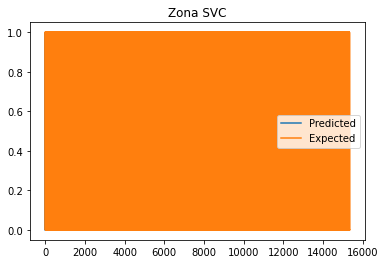

In [ ]:
y_predictsvc = svm.predict(x_val)
import matplotlib.pyplot as plt
plt.plot(y_predictsvc, label='Predicted')
plt.plot(y_test.values, label='Expected')
plt.title("Zona SVC")
plt.legend()
plt.show()

In [ ]:
#guardo el modelo
import pickle
rlfile = open("/content/drive/MyDrive/bigdata3/modelos/modelo_zonaSvc.pickle", 'wb')
pickle.dump(svm,rlfile)
rlfile.close()